# Autimated detection of Multiple Sclerosis patients by brain connectivity networks

## Abstract 


## Index

**1. Introduction**

**2. Methods**

*   2.1: MRI acquistion
*   2.2: Data available
*   2.3: Parcellation scheme
*   2.4: Brain Networks Connectivity
** 2.4.1. Structural white matter brain network
** 2.4.2. Structural gray matter brain network
** 2.4.3. Resting-state functional brain network
*   2.5: Data preprocessing steps
** 2.5.1. Load data 
** 2.5.2. Connectivity test (filtering the connections present in less than 60% of the FA-weighted matrices from healthy cohort)
** 2.5.3. Age and gender correction
** 2.5.4. Data harmonization (ComBat)
** 2.5.5. Imputation by the higher prevalence of zero values
** 2.5.6. Statistically significant connections with Bonferroni

**3. Results**
*   3.1: Connectogram
*   3.2: Machine learning algorithms to classify between healthy controls and MS patients
** 3.2.1. Support Vector Regressor
** 3.2.2. Random Forest Classifier
** 3.2.3. XGBoost
** 3.2.4. Clustering

**4. Conclusions**


## 1. Introduction

Multiple sclerosis (MS) is a chronic inflammatory, demyelinating and neurodegenerative disease of the central nervous system characterized by the presence of focal lesions and widespread damage of the normal-appearing white (NAWM) and grey (GM) matter (Lassmann, Brück and Lucchinetti, 2007). MS disease course present substantial heterogeneity in their pathological processes and different patterns of damage have been described  (Mahad, Trapp and Lassmann, 2015; Lassmann, 2018). Indeed, while  the active plaques are often found in early disease, at later stages, smoldering, inactive, and shadow plaques predominate. Also, chronic active lesions are associated with more aggressive disease evolution (Absinta et al., 2019) and while some patients recover completely from relapses others accumulate disability in a short period of time, probably due to differences in remyelination and diffuse neurodegenerative damage. However, the changes observed in conventional MRI are poorly associated with the clinical outcomes and disease evolution, in part due to the inability of conventional imaging to characterize the heterogeneous pathology of normal-appearing brain tissue (NAWM and NAGM).

 
The use of advanced analysis techniques algorithms is expanding the knowledge in MS disease, and has been applied recently to classify between healthy controls and patients (Solana & Martinez-Heras et al., 2019), among different clinical profiles of MS (Zurita et al., 2018), depict disease evolution (Muthuraman et al., 2016) or to characterize the different degree of damage into MS lesions types (Martinez-Heras & Solana et al., 2020). **We hypothesize that the information of morphological, structural and functional network patterns can potentially generate predictive markers to differentiate between healthy controls and MS patients. Contrary to the previous article by (Solana & Martinez-Heras et al., 2019), in this study we are going to use the information of  statistically significant connections instead of graph metrics measures. The clasification method achieved an accuracy around 75-77% to differentiate both cohorts.**   

## 2. Methods

### 2.1: MRI acquistion

MRI acquisition protocols were acquired on a 3T Magnetom Trio scanner (SIEMENS, Erlanger, Germany) using a 32 channel phased-array head coil. In part of the cohort (n=71 participants), the high-resolution three-dimensional Magnetization-Prepared Rapid Acquisition with Gradient Echo (3D-MPRAGE) was acquired with TR = 1800 ms; TE = 3.01 ms; TI = 900 ms; 240 sagittal slices with 0.94 mm isotropic voxel size and a 256 × 256 matrix size; and the three-dimensional Fluid Attenuated Inversion Recovery (3D-T2 FLAIR) with TR = 5000 ms; TE = 304 ms; TI = 1800 ms; 192 sagittal slices with 0.94 mm isotropic voxel size and a 256 × 256 matrix size. The Diffusion-Weighted Imaging (DWI) had a TR = 14800 ms; TE = 103 ms; 100 contiguous axial slices; 1.5 mm isotropic voxel size; a 154 × 154 matrix size; b value = 1000 s/ mm2; 60 diffusion encoding directions and a single baseline image acquired at 0 s/mm2. The reminding participants (n=94) had a 3D-structural image with TR = 1970 ms; TE = 2.41 ms; TI = 1050 ms; 208 sagittal slices with 0.9 mm isotropic voxel size and a 256 x 256 matrix size; and the 3D-T2 FLAIR with TR = 5000 ms; TE = 393 ms; TI = 1800 ms; 208 sagittal slices with 0.9 mm isotropic voxel size and a 256 × 256 matrix size. The DWI acquisition protocol was as follows: TR = 12600 ms; TE = 112 ms; 80 contiguous axial slices; 2 mm isotropic voxel size; a 120 × 120 matrix size; b value = 1500 s/ mm2; 70 diffusion encoding directions and a single baseline image acquired at 0 s/mm2. In addition, field map images were generated in all participants to correct the distortions caused by field inhomogeneities (TE 1/TE 2 = 4.92/7.38 ms, with the same slice prescription, slice thickness and field of view as the DWI sequence).

For both cohorts, it was acquired the same protocol of resting-state functional MRI (rs-fMRI) using BOLD EPI pulse sequence (fat saturation), with TR = 2000 ms; TE = 19 ms; field of view = 220 mm; 40 contiguous axial slices with 1.7 x 1.7 x 3 mm voxel size; GRAPPA-factor of 4 and a total of 450 frames (TA = 15:14 minutes). Magnetic resonance acquisition and processing

### 2.2: Data available

Patients with relapsing-remitting or secondary progressive MS aged between 18 and 65 years were recruited at the MS Unit in the Hospital Clinic of Barcelona. We included a cohort of 147 patients with a diagnosis of MS according to 2010 McDonald criteria (Polman et al. 2011) and 18 HV without a previous or present history of neurological or psychiatric diseases. Physical disability was evaluated using the Expanded Disability Status Scale (EDSS). The Ethics Committee of the Hospital Clinic of Barcelona approved the study, and all participants signed an informed consent. Acquisition details

### 2.3: Parcellation scheme

3D-MPRAGE and 3D-FLAIR images were used to perform the delineation of WM lesions through JIM7 software (http://www.xinapse.com/). Subsequently, WM lesions were filled in 3D-MPRAGE with the intensity of the non-lesional neighboring voxels to improve the registration and segmentation processing of MS patients (Battaglini et al. 2012).   Lesion filling approach was used to parcellate the cortex into 62 GM regions and 14 subcortical regions by Mindboggle software and FSL-FIRST packages respectively (Klein et al. 2017) (Patenaude et al. 2011) . Depiction of those brain regions are considered as the nodes of a brain network.    


### 2.4: Brain Networks Connectivity

#### 2.4.1: Structural white matter brain network

To build FA-weighted connectivity matrix is necessary a DWI preprocessing pipeline has been previously described and well-established by (Tournier et al. 2019). Accordingly, the major components of this pipeline included a MP-PCA denoising, Gibbs ringing removal, eddy current and motion correction, geometrically unwarping procedure and lastly a bias field correction. After these corrections, fractional anisotropy (FA) scalar map was computed from the diffusion tensor model using FSL’s DTIFIT (Basser et al. 1994). The connectome construction derived from FA-weighted indices was generated using the result of the high-order probabilistic streamline tractography between distinct cortical and subcortical GM areas (nodes) of the whole brain. To guarantee a biologically plausible reconstructed streamlines, the process of connectome reconstruction has incorporated the anatomical constrained tractography (ACT) framework, a set of 6 million streamlines have been selected and an anatomical exclusion criteria post-processing (Llufriu et al. 2017) (Martínez-Heras et al. 2015). The parcellation scheme (76 nodes) from anatomical image was aligned to the FA map to determine which streamlines connections need to be selected between pairs of nodes for creating the structural connectome. Finally, we defined the mean value of the FA metric along each connection to generate the FA-weighted adjacency matrix (Solana et al. 2019).



#### 2.4.2: Structural gray matter brain network

We generated another structural network based on the similarity of GM morphological patterns according to the defined anatomical parcellation scheme (Tijms et al. 2012). To estimate this GM connectivity network, we applied an automated pipeline that included two main steps: (1) Reslicing each individual’s native space GM segmentation to 2mm isotropic voxel to later on define small regions of interest corresponding to 3 x 3 x 3 voxel cube (2) Performing statistical similarity (Pearson’s correlation coefficient) along the corresponding voxel cubes. All correlations corresponding for each node, which between them added up, were stored into a matrix to construct the GM network.    

#### 2.4.3: Resting-state functional brain network

Brain signal correlation/synchronization through resting-state functional connectivity (rs-fMRI) matrix was obtained following the analysis method (Chou et al. 2012). This includes several preprocessing steps including slice time and motion correction, spatial normalization to standard space and band-pass filtering to retain frequencies between 0.001 and 0.08 Hz using FSL tools (Jenkinson et al. 2012). Finally, the parcellation nodes were used to extract the average time-series for each of the 76 regions resulting in a functional connectivity matrix.   



### 2.5: Data preprocessing steps

#### 2.5.1. Load data

As described above, data obtained from study participants were stored in three matrices

In [ ]:
##Activate Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#cd '/content/gdrive/MyDrive/Colab Notebooks/UB/PostGrau/TFM/Capstone_Project'

In [1]:
# Data Load Code
from load_data import data_loader

# Preprocessing functions
from preprocessing import connectivity_test, linear_correction, harmonization
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
full_dataset, fa, func, gm = data_loader(unzip=False)

In [3]:
fa.tail()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
sFIS_04,0.437912,0.000000,0.0,0.0,0.436493,0.0,0.513600,0.0,0.429750,0.0,...,0.338393,0.366659,0.344687,0.393881,0.332806,32.98,1,-1.0,0.0,0
sFIS_05,0.453001,0.000000,0.0,0.0,0.485008,0.0,0.510843,0.0,0.442475,0.0,...,0.372121,0.403923,0.429492,0.420724,0.392092,23.76,0,-1.0,0.0,0
sFIS_06,0.444399,0.000000,0.0,0.0,0.000000,0.0,0.538231,0.0,0.475603,0.0,...,0.416458,0.415719,0.447216,0.435247,0.410552,24.11,0,-1.0,0.0,0
sFIS_07,0.486600,0.513572,0.0,0.0,0.490968,0.0,0.539344,0.0,0.000000,0.0,...,0.390548,0.413046,0.388173,0.413104,0.361699,23.98,0,-1.0,0.0,0
sFIS_09,0.460415,0.000000,0.0,0.0,0.440825,0.0,0.576394,0.0,0.478940,0.0,...,0.427068,0.446510,0.463700,0.454766,0.422275,23.46,0,-1.0,0.0,0


#### 2.5.2. Connectivity test (filtering the connections present in less than 60% of the FA-weighted matrices from healthy cohort)

In [4]:
# Clinical Data

clinical_data = fa.iloc[:, -5:]

# Connectivity test
index = connectivity_test(fa.iloc[:, :-5], clinical_data)

fa_conec = fa.iloc[:, index]
func_conec = func.iloc[:, index]
gm_conec = gm.iloc[:, index]

fa_conec.tail()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiorparietal/ctx-rh-superiortemporal,fa-ctx-rh-superiorparietal/ctx-rh-supramarginal,fa-ctx-rh-superiorparietal/ctx-rh-transversetemporal,fa-ctx-rh-superiorparietal/ctx-rh-insula,fa-ctx-rh-superiortemporal/ctx-rh-supramarginal,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula
sFIS_04,0.437912,0.436493,0.513600,0.429750,0.432757,0.000000,0.420514,0.410831,0.382987,0.401635,...,0.456611,0.410892,0.437383,0.434414,0.356735,0.338393,0.366659,0.344687,0.393881,0.332806
sFIS_05,0.453001,0.485008,0.510843,0.442475,0.465207,0.000000,0.415272,0.461950,0.000000,0.435075,...,0.499724,0.439607,0.478599,0.471359,0.412837,0.372121,0.403923,0.429492,0.420724,0.392092
sFIS_06,0.444399,0.000000,0.538231,0.475603,0.446980,0.000000,0.427906,0.464113,0.431740,0.468737,...,0.523202,0.479137,0.492792,0.499025,0.428173,0.416458,0.415719,0.447216,0.435247,0.410552
sFIS_07,0.486600,0.490968,0.539344,0.000000,0.416983,0.000000,0.421023,0.458127,0.000000,0.428983,...,0.472483,0.448468,0.456415,0.464796,0.400233,0.390548,0.413046,0.388173,0.413104,0.361699
sFIS_09,0.460415,0.440825,0.576394,0.478940,0.492266,0.467873,0.445297,0.471779,0.444573,0.458962,...,0.515955,0.475279,0.507160,0.508530,0.460155,0.427068,0.446510,0.463700,0.454766,0.422275


#### 2.5.3. Age and gender correction

In [5]:
fa_correct = linear_correction(clinical_data, fa_conec)
func_correct = linear_correction(clinical_data, func_conec)
gm_correct = linear_correction(clinical_data, gm_conec)

fa_correct.tail()

,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-medialorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-middletemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-paracentral,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsopercularis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parsorbitalis,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-parstriangularis,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
sFIS_04,0.430788,0.450175,0.515509,0.449645,0.424000,0.0000,0.420407,0.406309,0.384843,0.394141,...,0.332517,0.369312,0.335621,0.394486,0.331953,32.98,1,-1.0,0.0,0
sFIS_05,0.436726,0.509721,0.509667,0.457909,0.442735,0.0000,0.409901,0.440541,0.000000,0.411800,...,0.363557,0.397600,0.415235,0.405084,0.384904,23.76,0,-1.0,0.0,0
sFIS_06,0.428366,0.000000,0.537060,0.490742,0.424838,0.0000,0.422603,0.442999,0.468241,0.445795,...,0.408032,0.409463,0.433186,0.419804,0.403460,24.11,0,-1.0,0.0,0
sFIS_07,0.470477,0.515442,0.538171,0.000000,0.394718,0.0000,0.415694,0.436903,0.000000,0.405918,...,0.382070,0.406766,0.374059,0.397587,0.354572,23.98,0,-1.0,0.0,0
sFIS_09,0.443932,0.465865,0.575213,0.494627,0.469513,0.5199,0.439866,0.450117,0.481965,0.435401,...,0.418385,0.440130,0.449250,0.438958,0.415005,23.46,0,-1.0,0.0,0


#### 2.5.4. Data harmonization (ComBat)

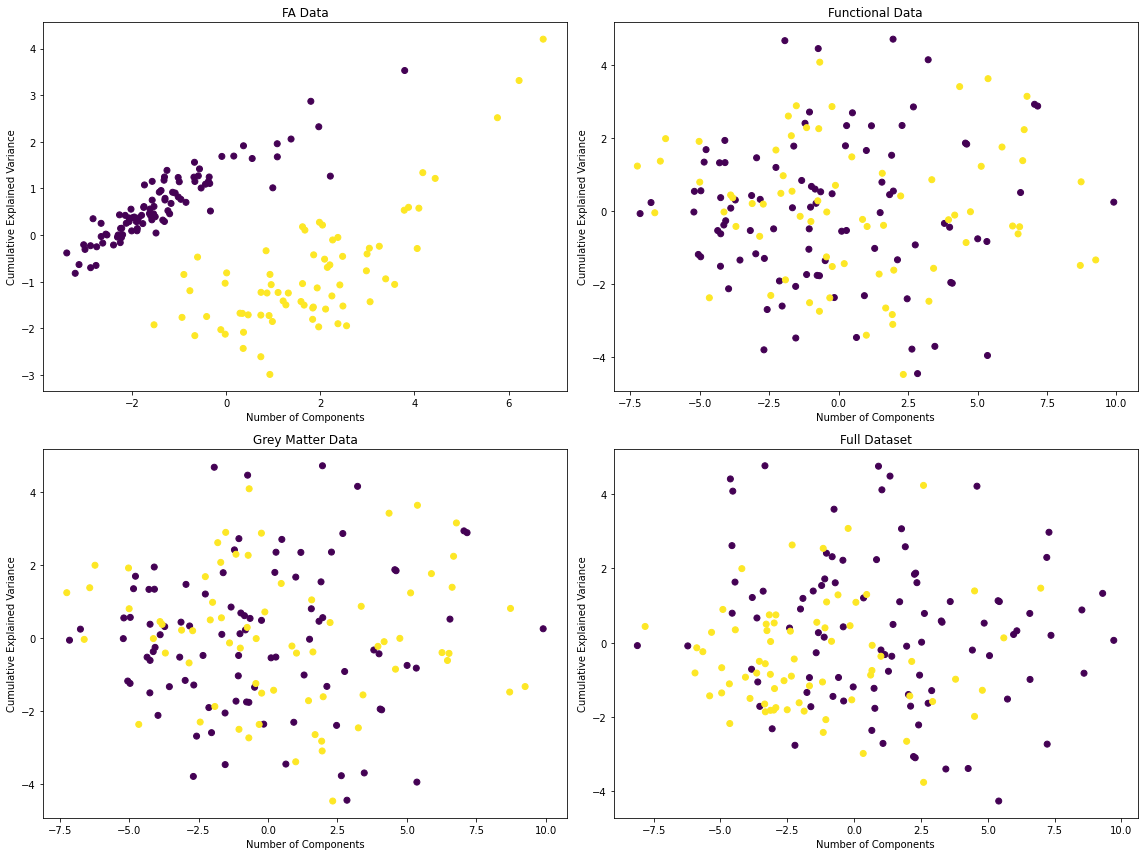

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

data = [fa_correct.iloc[:, :-5], func_correct.iloc[:, :-5], gm_correct.iloc[:, :-5], full_dataset.iloc[:, :-5]]
names = ["FA Data", "Functional Data", "Grey Matter Data", "Full Dataset"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
scanner = [0 if "MSVIS" in name else 1 for name in fa.index]

for i in range(2):
    for j in range(2):
        pca_variables = data[i+j]
        pca = PCA(n_components=2)
        pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)
        axs[i, j].scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

for i,ax in enumerate(axs.flat):
    ax.set(xlabel='Number of Components', ylabel='Cumulative Explained Variance', title=names[i])
    
fig.tight_layout()

In [7]:
#! git clone https://github.com/Jfortin1/neuroCombat.git

In [8]:
from neuroCombat import neuroCombat

dat = fa_correct.iloc[:, :-5].transpose()

index = [name for name in fa_correct.index]
scanner = [0 if "MSVIS" in name else 1 for name in index]
clinical_data["scanner"] = scanner

har_data = neuroCombat(dat = dat,
                       covars = clinical_data,
                       batch_col = "scanner")

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


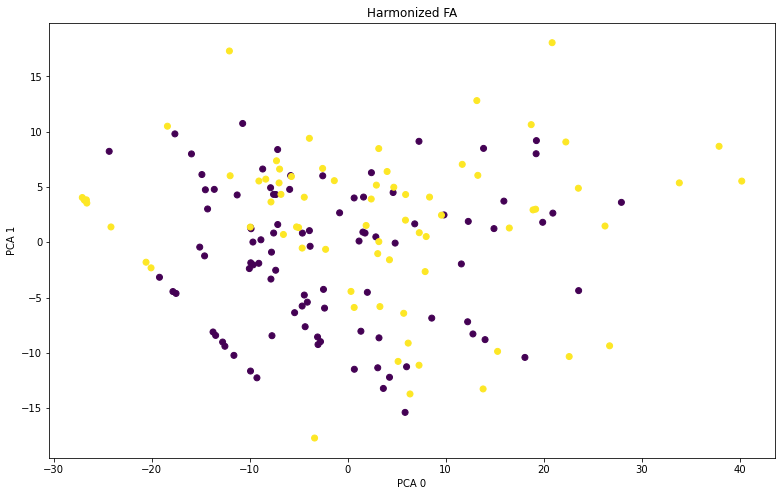

In [9]:
clinical_data.drop(["scanner"], axis=1, inplace=True)
fa_har = pd.concat([pd.DataFrame(har_data["data"].transpose(), index = fa_correct.iloc[:, :-5].index, columns = fa_correct.iloc[:, :-5].columns), clinical_data], 
                     join = "inner", 
                     axis=1)

pca_variables = fa_har
pca_fa = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)
plt.figure(figsize=(13, 8))
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.title("Harmonized FA")
plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

#### 2.5.5. Imputation by the higher prevalence of zero values

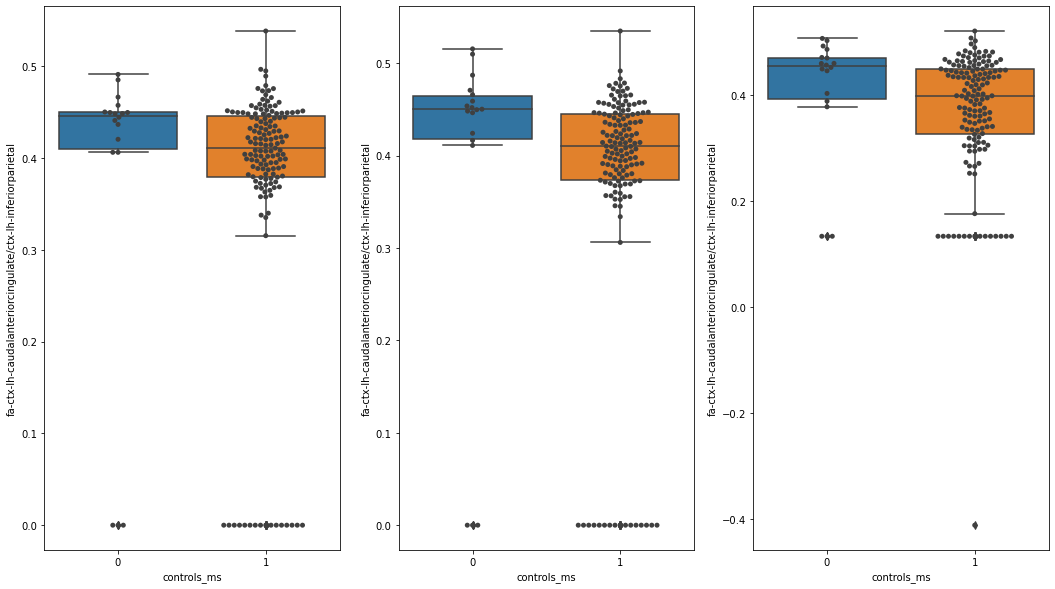

In [10]:
data = [pd.concat([fa_conec, clinical_data], join="inner", axis=1), fa_correct, fa_har]

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i in range(3):
    sns.boxplot(ax=axes[i],
                y=fa_conec.columns[1], 
                x='controls_ms', 
                data=data[i])

    sns.swarmplot(ax = axes[i],
                  y=fa_conec.columns[1], 
                  x='controls_ms', 
                  data=data[i], 
                  color=".25")

In [11]:
def outlier_imputation(neuro_data):
    """
    Deals with the problem of zero-values in data by using linear regression models for imputation.

    Arguments:
    ----------

    neuro_data: data that have to be corrected. Important, do not include Clinical Data.

    Returns:
    --------

    pandas dataframe with the corrected data.
    """
    columns = [col for col in neuro_data.columns]
    df = neuro_data.copy()
    
    model = LinearRegression()

    for col in columns:
        if df[df[col] == 0].shape[0] != 0:
            X_train, y_train = df[df[col] != 0].drop([col], axis = 1), df[df[col] != 0][col]
            X_test = df[df[col] == 0].drop([col], axis = 1)

            model = LinearRegression()
            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            df.loc[X_test.index, col] = pred
    return df

In [12]:
from sklearn.linear_model import LinearRegression

fa_imputed = outlier_imputation(fa_correct.iloc[:, :-5])
func_imputed = outlier_imputation(func_correct.iloc[:, :-5])
func_imputed = pd.concat([func_imputed, func.iloc[:, -5:]], axis=1, join="inner")
gm_imputed = outlier_imputation(gm_correct.iloc[:, :-5])
gm_imputed = pd.concat([gm_imputed, gm.iloc[:, -5:]], axis=1, join="inner")

#harmonization
dat = fa_imputed.iloc[:, :-5].transpose()

index = [name for name in fa_imputed.index]
scanner = [0 if "MSVIS" in name else 1 for name in index]
clinical_data["scanner"] = scanner

har_data = neuroCombat(dat = dat,
                       covars = clinical_data,
                       batch_col = "scanner")

#clinical_data.drop(["scanner"], axis=1, inplace=True)
fa_har = pd.concat([pd.DataFrame(har_data["data"].transpose(), index = fa_imputed.iloc[:, :-5].index, columns = fa_imputed.iloc[:, :-5].columns), clinical_data], 
                     join = "inner", 
                     axis=1)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


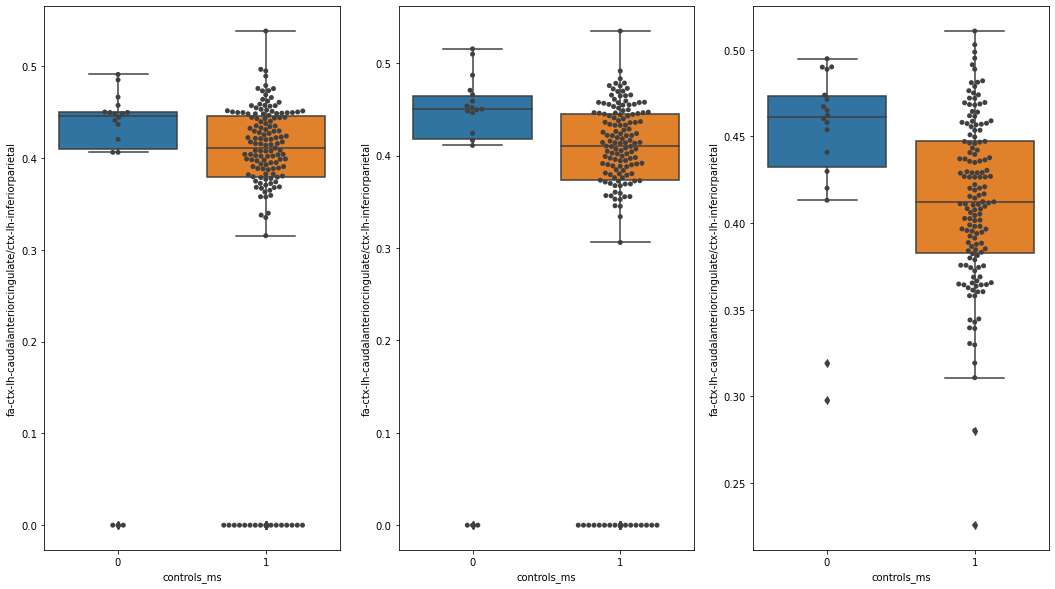

In [13]:
data = [pd.concat([fa_conec, clinical_data], join="inner", axis=1), fa_correct, fa_har]

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

for i in range(3):
    sns.boxplot(ax=axes[i],
                y=fa_conec.columns[1], 
                x='controls_ms', 
                data=data[i])

    sns.swarmplot(ax = axes[i],
                  y=fa_conec.columns[1], 
                  x='controls_ms', 
                  data=data[i], 
                  color=".25")

#### 2.5.6. Statistically significant connections with Bonferroni

In [14]:
def types_diff(data):
    conn_stat = pd.DataFrame(columns=['ROI','pvalue'])
    feats = data.iloc[:, :-6].columns.to_list()
    for connections in feats:
        stat,p = shapiro(data[connections])
        alpha=0.05
        sample1 = data.loc[data["controls_ms"]==0,connections]
        sample2 = data.loc[data["controls_ms"]==1,connections]
        if p > alpha:
            stat, p = bartlett(sample1,sample2)
            homovar = True
            if (p<=0.05):
                homovar = False
            stat,p = ttest_ind(sample1,sample2,equal_var=homovar)
        else:
            stat,p = mannwhitneyu(data.loc[data["controls_ms"]==0,connections],data.loc[data["controls_ms"]==1,connections],alternative='two-sided')
    
        if (p<=0.05):
            conn_stat = conn_stat.append({'ROI': connections,'pvalue': p}, ignore_index=True)
        
    print('Statistically diferences in %d of connections' % len(conn_stat))

    diff = conn_stat.copy()

    p_corr = multipletests(diff["pvalue"], alpha = 0.05, method = "bonferroni", is_sorted = False)
    diff["p_corr"] = p_corr[1] #Added the bonferroni correction
    diff_fdr = diff[diff["p_corr"] < 0.05] 
    print('Statistically diferences in %d of connections with Bonferroni correction (p-value multiplied by number of correlations) ' % len(diff_fdr))
    diff_fa = diff_fdr["ROI"].tolist()
    fa_clinic = data.loc[:,["age", "sex", "dd", "edss", "controls_ms"]]
    fa_har_bonferroni = data[diff_fa]
    fa_har_corr = pd.merge(fa_har_bonferroni, fa_clinic, left_index=True, right_index=True)
    
    return fa_har_corr

In [15]:
# Statistics
from scipy.stats import mannwhitneyu, ttest_ind, bartlett, shapiro
from statsmodels.stats.multitest import fdrcorrection, multipletests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
#FA-weighted connections statistically significant 
fa_final = types_diff(fa_har)

Statistically diferences in 1124 of connections
Statistically diferences in 183 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


In [16]:
#Structural gray matter brain network 
gm_final = types_diff(gm_imputed)

Statistically diferences in 378 of connections
Statistically diferences in 3 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


In [17]:
#Resting-state functional brain network
func_final = types_diff(func_imputed)

Statistically diferences in 127 of connections
Statistically diferences in 1 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


In [18]:
data_final = pd.concat([fa_final.iloc[:, :-5], gm_final.iloc[:, :-5], func_final.iloc[:, :-5]], join="inner", axis=1)

## 3. Results

### 3.1: Connectogram 

Visualization of statistically significant connections of each brain networks (FA, GM and rsfmri). 

### 3.2: Machine learning algorithms to classify between healthy controls and MS patients 

In [19]:
# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Metrics
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [20]:
#! pip install imblearn #imbalanced-learn documentation
#! pip install xgboost

In [35]:
def data_augmentation(X, y):
    """
    performing data augmentation by using the SMOTE library, which created new instances by using KNN algorithm.
    Arguments:
    ---------
    X: Independent variables
    y: Target
    Returns:
    -------
    X: data-augmented independent variables
    y: data-augmented target
    """

    sm = SMOTE(random_state=42)
    X_res, Y_res = sm.fit_resample(X, y)

    df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res)], axis=1, join="inner")

    return df_smote_over

In [51]:
from imblearn.over_sampling import SMOTE

df_final = data_augmentation(data_final, fa_final.iloc[:, -1])#Control vs MS
X = df_final.iloc[:, :-1]
y = df_final.iloc[:, -1]

In [52]:
from sklearn.linear_model import LogisticRegression

def evaluation(X, y, model):
    mean_score = 0
    logistic_model = model
    kf = StratifiedKFold(n_splits=5)
    sc = StandardScaler()
    for train_index, test_index in kf.split(X, y):
        X_train, y_train = sc.fit_transform(X.iloc[train_index, :]), y.iloc[train_index]
        X_test, y_test = sc.transform(X.iloc[test_index, :]), y.iloc[test_index]
        logistic_model.fit(X_train, y_train)
        y_hat = logistic_model.predict(X_test)
        mean_score += f1_score(y_hat, y_test)
    print(mean_score/5)

evaluation(X, y, LogisticRegression())

0.9631795820064148


#### 3.2.1. Support Vector Regressor

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sc = StandardScaler()
X_std = sc.fit_transform(X)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 
                     'gamma': [1e-3, 1e-4, 1e-2, 1e-5],
                     'C': [1, 10, 100, 500, 1000, 3000]}]

clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='f1')

clf.fit(X_std, y)
print(clf.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [43]:
evaluation(X, y, SVC(kernel="rbf", C=15, gamma=0.001))

0.9700761337305529


#### 3.2.2. Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [200, 500, 700, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 5, 7]
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_std, y)
CV_rfc.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}

In [45]:
evaluation(X, y, RandomForestClassifier(max_depth=13, max_features = "sqrt", n_estimators = 200))

0.9637426900584796


#### 3.2.3. XGBoost

In [28]:
from xgboost import XGBClassifier

sc = StandardScaler()
X_std = sc.fit_transform(X)
# Set the parameters by cross-validation
tuned_parameters = [{"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                     "max_depth": [ 3, 4, 5, 6, 8, 10, 12, 15],
                     "min_child_weight": [ 1, 3, 5, 7 ],
                     "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                     "colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ],
                     "n_jobs": [1], # replace "nthread"
                     "verbosity": [0]}]# add this line to slient warning message

xgb_gs = GridSearchCV(
        XGBClassifier(), tuned_parameters, scoring='f1')

xgb_gs.fit(X_std, y)
print(xgb_gs.best_params_)

/home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_jobs': 1, 'verbosity': 0}


In [29]:

evaluation(X, y, XGBClassifier(colsample_bytree= 0.5, gamma= 0.2, learning_rate= 0.05, max_depth= 3, min_child_weight= 5))

/home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.

0.9343943039306446


#### 3.2.4. Clustering

In [63]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=20, random_state=42)),
    ("log", LogisticRegression(max_iter=1000)),
])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=20, random_state=42)),
                ('log', LogisticRegression(max_iter=1000))])

In [64]:
pred = pipeline.predict(X_valid)

In [65]:
f1_score(pred, y_valid)

0.9310344827586207